## Factor Analysis

**Factor analysis** is a regression method you can apply to discover *root causes* or *hidden factors* that are present in the dataset, but not observable.  

Factors are also called latent variables. Latent variables are variables that are meaningful, but that are inferred and not directly observable. T

**Assumptions:**
- Metric features
- Features are either continuous or ordinal
- Correlation coefficient **r** > 0.3
- Observations > 100 *and* > 5 observations per feature.
- Sample is homogenous.

Factor analysis outputs **loadings**.
- Loadings near to -1 or 1 mean that factor has a strong influence on the variable. 
- Loadings that are close to zero mean that the factor weakly influences the variable. 
- Loadings > 1 mean that these are highly correlated factors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis


In [9]:
iris = load_iris()

data = iris.data
target = iris.target

df = pd.DataFrame(data, columns = iris.feature_names)
df['Target'] = target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
factor = FactorAnalysis()
factor.fit(data)

data_fitted = pd.DataFrame(factor.components_, columns = iris.feature_names)
data_fitted

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


## Principal component analysis

**Singular value decomposition** is a linear algebra method that can be used to decompose a matrix into 3 resultant matrices in order to reduce information redundancy and noise. SVD is most commonly used for principal component analysis. 

You can see here that we've got our original matrix. This is our original dataset. It's called A. And we decompose it into three resultant matrices, U, S, and V. U is the left orthogonal matrix and it holds all of the important, non-redundant information about the observations in the original dataset. V is the right orthogonal matrix and it holds all of the important, non-redundant information on features in the original dataset. S is the diagonal matrix and it contains all of the information about the decomposition processes that were performed during the compression. Let's look at principal component analysis. Like I said, this is the most common application of SVD. Principal component analysis is an unsupervised machine learning algorithm that discovers relationships between variables and reduces variables down to a set of correlated synthetic representations called principal components. 


**Principal components** are synthetic representations of a dataset. Principal components contain all of the dataset's important information but do not include the noise, information redundancy, and outliers that were present in the original dataset. 

Comparison between factors and components:
- Both factors and components represent what is left of a dataset after information redundancy and noise has been stripped out.
- Both are used as input variables for machine learning algorithms to generate predictions from those compressed representations the data.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from IPython.display import Image
from IPython.core.display import HTML

import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [37]:
iris = load_iris()

data = iris.data
target = iris.target

In [41]:
pca = PCA()

data_pca = pca.fit_transform(data)

print(f'Explained Variance Ratio: {pca.explained_variance_ratio_ }\nCumulative Variance: {pca.explained_variance_ratio_.sum():.2}')

Explained Variance Ratio: [0.92461872 0.05306648 0.01710261 0.00521218]
Cumulative Variance: 1.0


**Explained Variance Ratio** refers to how much information is compressed into the first few components.  
Cumulative Variance is mainly used to figure number of components to keep [Mostly > 70%]

In [39]:
comnponents = pd.DataFrame(pca.components_, columns= iris.feature_names)

<Axes: >

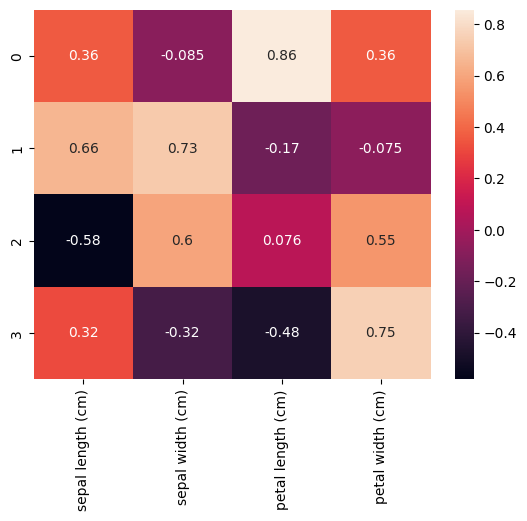

In [36]:
sns.heatmap(comnponents, annot=True)